In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
def normalise(df):
    return (df - df.min()) / (df.max() - df.min())

### Using new case numbers to predict number of healthcare workers infected on same day.

In [3]:
df = pd.read_csv("data/new_daily_cases.csv")
df = df.drop([0])
df = normalise(df)

X = np.column_stack((np.array(df['ConfirmedCovidCases']), np.array(df['HospitalisedCovidCases']), np.array(df['RequiringICUCovidCases'])))
y = np.array(df['HealthcareWorkersCovidCases'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X)
y_pred_dummy = dummy.predict(X)

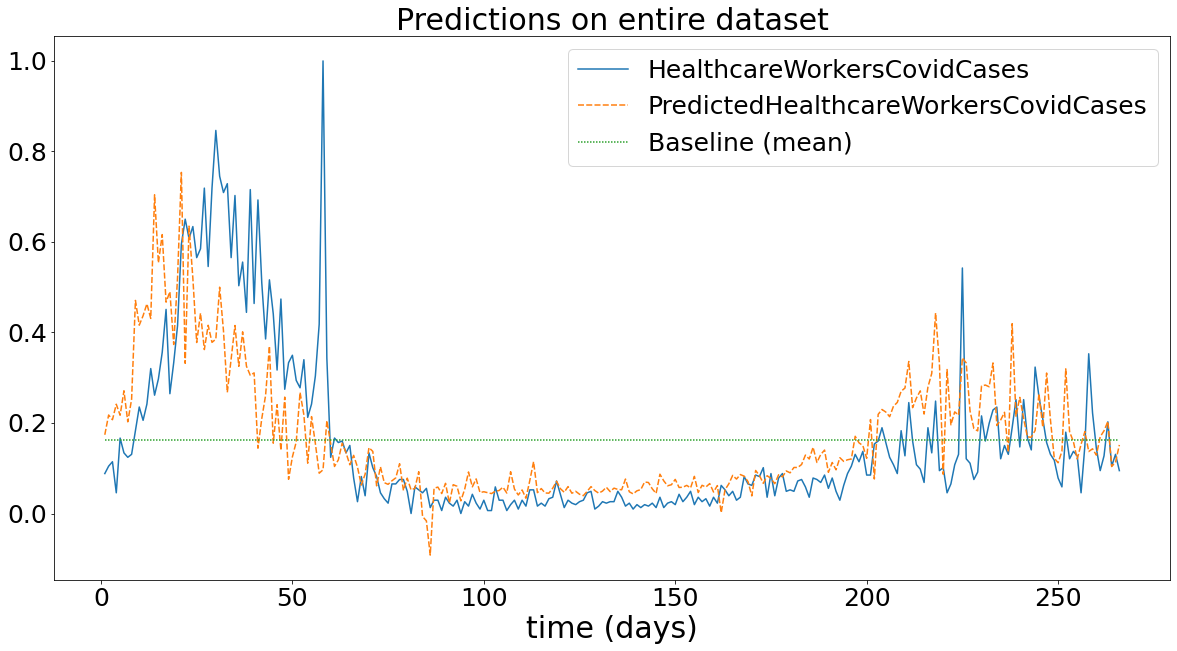

In [5]:
df_new = pd.DataFrame()
df_new['HealthcareWorkersCovidCases'] = df['HealthcareWorkersCovidCases']
df_new['PredictedHealthcareWorkersCovidCases'] = y_pred
df_new['Baseline (mean)'] = y_pred_dummy

fig = plt.figure(figsize=(20,10))
sns.lineplot(data=df_new)
plt.legend(prop={'size': 25})
plt.title('Predictions on entire dataset', fontsize=30)
plt.xlabel('time (days)', fontsize=30)
plt.tick_params(labelsize=25)
plt.show()

In [6]:
mse_train = mean_squared_error(y_train, model.predict(X_train))
mse_test = mean_squared_error(y_test, model.predict(X_test))
mse_train_dummy = mean_squared_error(y_train, dummy.predict(X_train))
mse_test_dummy = mean_squared_error(y_test, dummy.predict(X_test))

print('MSE train (linear model): {:.5f}\tMSE train (baseline mdoel): {:.5f}'.format(mse_train, mse_train_dummy))
print('MSE test (linear model): {:.5f}\tMSE train (baseline mdoel): {:.5f}'.format(mse_test, mse_test_dummy))

MSE train (linear model): 0.02095	MSE train (baseline mdoel): 0.03729
MSE test (linear model): 0.00982	MSE train (baseline mdoel): 0.02173


### Using new case numbers from previous $n$ days to predict healthcare worker cases.

### $n = 7$

In [7]:
X_7 = np.column_stack((X[:-7], X[1:-6], X[2:-5], X[3:-4], X[4:-3], X[5:-2], X[6:-1]))
y_7 = y[7:]

X_train, X_test, y_train, y_test = train_test_split(X_7, y_7, test_size=0.2, random_state=0)

In [8]:
dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_7)
y_pred_dummy = dummy.predict(X_7)

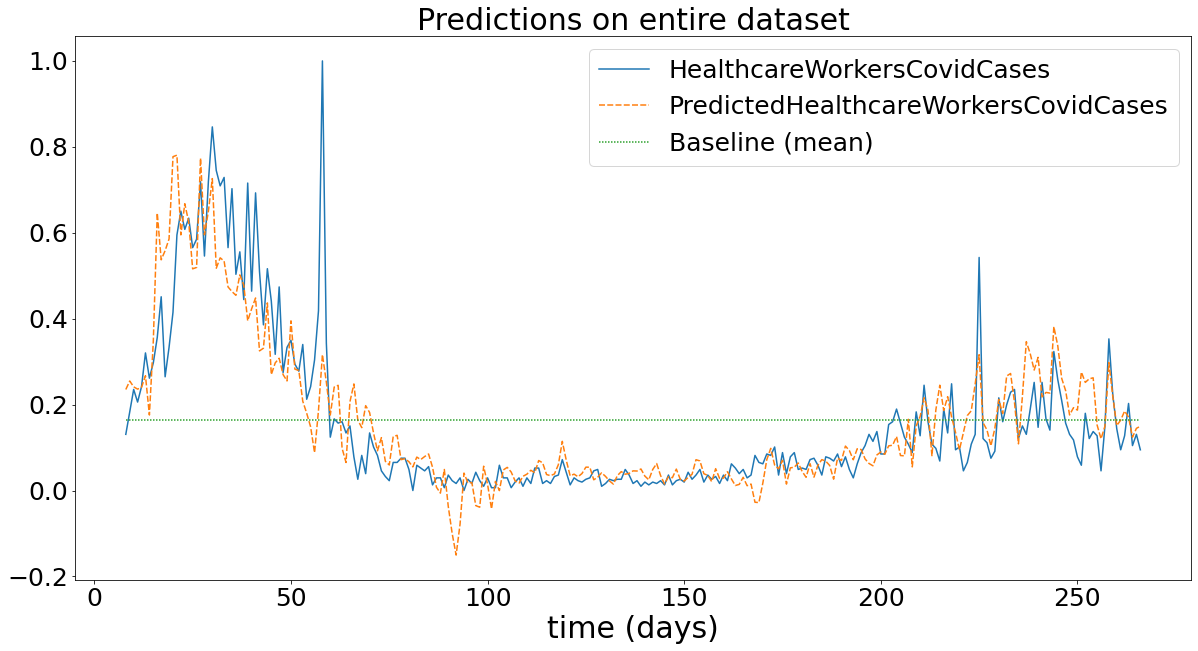

In [9]:
df_new = pd.DataFrame()
df_new['HealthcareWorkersCovidCases'] = df['HealthcareWorkersCovidCases'][7:]
df_new['PredictedHealthcareWorkersCovidCases'] = y_pred
df_new['Baseline (mean)'] = y_pred_dummy

fig = plt.figure(figsize=(20,10))
sns.lineplot(data=df_new)
plt.legend(prop={'size': 25})
plt.title('Predictions on entire dataset', fontsize=30)
plt.xlabel('time (days)', fontsize=30)
plt.tick_params(labelsize=25)
plt.show()

In [10]:
mse_train = mean_squared_error(y_train, model.predict(X_train))
mse_test = mean_squared_error(y_test, model.predict(X_test))
mse_train_dummy = mean_squared_error(y_train, dummy.predict(X_train))
mse_test_dummy = mean_squared_error(y_test, dummy.predict(X_test))

print('MSE train (linear model): {:.5f}\tMSE train (baseline mdoel): {:.5f}'.format(mse_train, mse_train_dummy))
print('MSE test (linear model): {:.5f}\tMSE train (baseline mdoel): {:.5f}'.format(mse_test, mse_test_dummy))

MSE train (linear model): 0.00904	MSE train (baseline mdoel): 0.03783
MSE test (linear model): 0.00784	MSE train (baseline mdoel): 0.02355


### $n = 14$

In [11]:
X_14 = np.column_stack((X[:-14], X[1:-13], X[2:-12], X[3:-11], X[4:-10], X[5:-9], X[6:-8], X[7:-7], X[8:-6], X[9:-5], X[10:-4], X[11:-3], X[12:-2], X[13:-1]))
y_14 = y[14:]

X_train, X_test, y_train, y_test = train_test_split(X_14, y_14, test_size=0.2, random_state=0)

In [12]:
dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_14)
y_pred_dummy = dummy.predict(X_14)

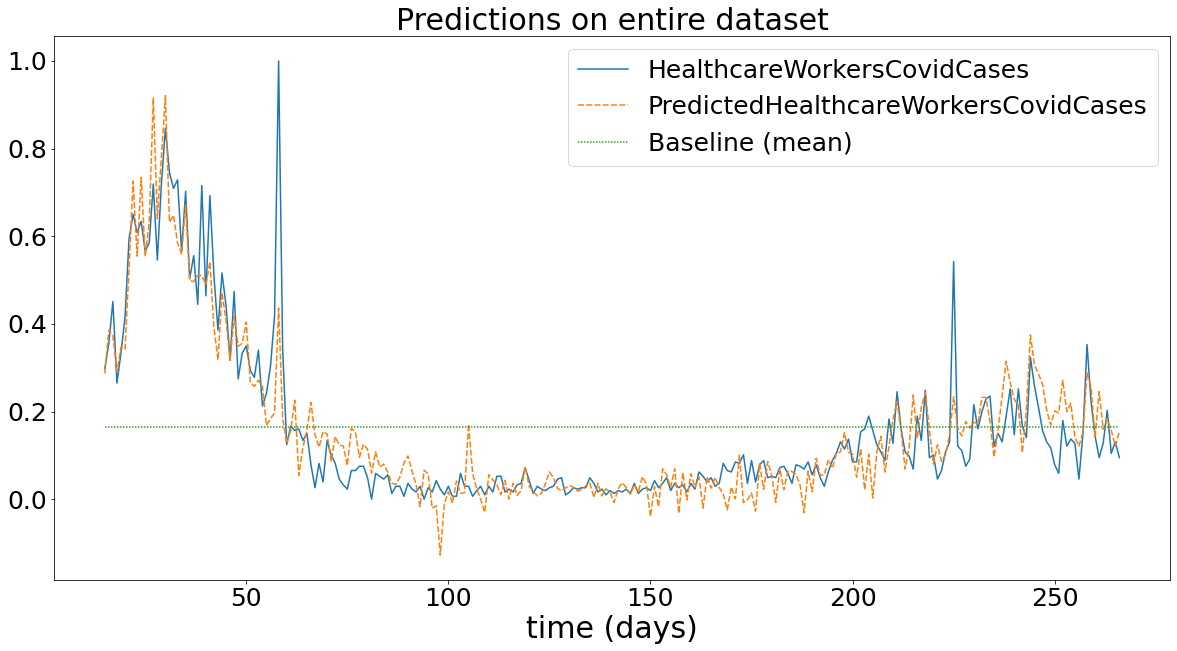

In [13]:
df_new = pd.DataFrame()
df_new['HealthcareWorkersCovidCases'] = df['HealthcareWorkersCovidCases'][14:]
df_new['PredictedHealthcareWorkersCovidCases'] = y_pred
df_new['Baseline (mean)'] = y_pred_dummy

fig = plt.figure(figsize=(20,10))
sns.lineplot(data=df_new)
plt.legend(prop={'size': 25})
plt.title('Predictions on entire dataset', fontsize=30)
plt.xlabel('time (days)', fontsize=30)
plt.tick_params(labelsize=25)
plt.show()

In [14]:
mse_train = mean_squared_error(y_train, model.predict(X_train))
mse_test = mean_squared_error(y_test, model.predict(X_test))
mse_train_dummy = mean_squared_error(y_train, dummy.predict(X_train))
mse_test_dummy = mean_squared_error(y_test, dummy.predict(X_test))

print('MSE train (linear model): {:.5f}\tMSE train (baseline mdoel): {:.5f}'.format(mse_train, mse_train_dummy))
print('MSE test (linear model): {:.5f}\tMSE train (baseline mdoel): {:.5f}'.format(mse_test, mse_test_dummy))

MSE train (linear model): 0.00553	MSE train (baseline mdoel): 0.03869
MSE test (linear model): 0.00509	MSE train (baseline mdoel): 0.02418
